In [ ]:
from pyspark.sql import SparkSession
# Initialize SparkSession
spark = SparkSession.builder \
.appName("Spark DataFrame Example") \
.getOrCreate()

# Pyspark DF to Pandas DF

In [ ]:
from pyspark.sql.types import StructType, StructField, StringType, IntegerType

dataStruct = [(("James","","Smith"),"36636","M","3000"), \
      (("Michael","Rose",""),"40288","M","4000"), \
      (("Robert","","Williams"),"42114","M","4000"), \
      (("Maria","Anne","Jones"),"39192","F","4000"), \
      (("Jen","Mary","Brown"),"","F","-1") \
]


schemaStruct = StructType([
        StructField('name', StructType([
             StructField('firstname', StringType(), True),
             StructField('middlename', StringType(), True),
             StructField('lastname', StringType(), True)
             ])),
          StructField('dob', StringType(), True),
         StructField('gender', StringType(), True),
         StructField('salary', StringType(), True)
         ])
df = spark.createDataFrame(data=dataStruct, schema = schemaStruct)
df.printSchema()

pandasDF2 = df.toPandas()
print(pandasDF2)

root
 |-- name: struct (nullable = true)
 |    |-- firstname: string (nullable = true)
 |    |-- middlename: string (nullable = true)
 |    |-- lastname: string (nullable = true)
 |-- dob: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- salary: string (nullable = true)

                   name    dob gender salary
0      (James, , Smith)  36636      M   3000
1     (Michael, Rose, )  40288      M   4000
2  (Robert, , Williams)  42114      M   4000
3  (Maria, Anne, Jones)  39192      F   4000
4    (Jen, Mary, Brown)             F     -1



# Column Class

- PySpark `Column` class represents a single Column in a DataFrame.
- The `pyspark.sql.Column` class provides several functions to work with DataFrames to manipulate column values, evaluate boolean expressions to filter rows, retrieve a value or part of a value from a DataFrame column.
- One of the simplest ways to create a `Column` class object is by using the PySpark `lit()` SQL function.

```python
from pyspark.sql.functions import lit

col1 = lit("abcd")
print(type(col1))
```

In [ ]:
from pyspark.sql.functions import lit, col

col_object = lit("literal value")

In [ ]:
type(col_object)

pyspark.sql.column.Column

# `lit()` Function to Add Constant Column
PySpark lit() function is used to add constant or literal value as a new column to the DataFrame.

In [ ]:

data = [("111",50000),("222",60000),("333",40000)]
columns= ["EmpId","Salary"]

df = spark.createDataFrame(data = data, schema = columns)
df.printSchema()
df.show(truncate=False)




root
 |-- EmpId: string (nullable = true)
 |-- Salary: long (nullable = true)

+-----+------+
|EmpId|Salary|
+-----+------+
|111  |50000 |
|222  |60000 |
|333  |40000 |
+-----+------+



In [ ]:
from pyspark.sql.functions import col, lit
df2 = df.select(col("EmpId"),
                col("Salary"),
                lit("1").alias("lit_value1"))
df2.show(truncate=False)



+-----+------+----------+
|EmpId|Salary|lit_value1|
+-----+------+----------+
|111  |50000 |1         |
|222  |60000 |1         |
|333  |40000 |1         |
+-----+------+----------+



In [ ]:
from pyspark.sql.functions import when, lit, col
df3 = df2.withColumn("lit_value2",
                     when((col("Salary") >=40000) & (col("Salary") <= 50000), lit("100")).otherwise(lit("200")))
df3.show(truncate=False)


+-----+------+----------+----------+
|EmpId|Salary|lit_value1|lit_value2|
+-----+------+----------+----------+
|111  |50000 |1         |100       |
|222  |60000 |1         |200       |
|333  |40000 |1         |100       |
+-----+------+----------+----------+



# Misc Concepts

---

In [ ]:
data=[("James",23),("Ann",40)]

df=spark.createDataFrame(data)
df.printSchema()


'''
Spark assigns generic column names like _1, _2 when you create a DataFrame from a list of tuples.
.toDF("col1", "col2", ...) lets you give clear, meaningful names to those columns.
'''


root
 |-- _1: string (nullable = true)
 |-- _2: long (nullable = true)



'\nSpark assigns generic column names like _1, _2 when you create a DataFrame from a list of tuples.\n.toDF("col1", "col2", ...) lets you give clear, meaningful names to those columns.\n'

In [ ]:
data=[("James",23),("Ann",40)]

df=spark.createDataFrame(data).toDF("fname","gender")
df.printSchema()

root
 |-- fname: string (nullable = true)
 |-- gender: long (nullable = true)



In [ ]:
from typing import NamedTuple
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("demo").getOrCreate()

# Step 1: Define a structure using NamedTuple
class Person(NamedTuple):
    name: str
    age: int

# Step 2: Create data using the tuple type
data = [Person("James", 23), Person("Ann", 40)]

# Step 3: Create DataFrame — no need for .toDF()
df = spark.createDataFrame(data)

df.printSchema()  # To avoid overflow and ensure compatibility, Spark defaults to LongType for any integer.
df.show()

root
 |-- name: string (nullable = true)
 |-- age: long (nullable = true)

+-----+---+
| name|age|
+-----+---+
|James| 23|
|  Ann| 40|
+-----+---+



In [ ]:
from pyspark.sql import Row
data=[Row(name="James",prop=Row(hair="black",eye="blue")),
      Row(name="Ann",prop=Row(hair="grey",eye="black"))]
df=spark.createDataFrame(data)
df.printSchema()

root
 |-- name: string (nullable = true)
 |-- prop: struct (nullable = true)
 |    |-- hair: string (nullable = true)
 |    |-- eye: string (nullable = true)



In [ ]:
df.select(df.prop.hair).show()
df.select(df["prop.hair"]).show()
df.select(col("prop.hair")).show()

+---------+
|prop.hair|
+---------+
|    black|
|     grey|
+---------+

+-----+
| hair|
+-----+
|black|
| grey|
+-----+

+-----+
| hair|
+-----+
|black|
| grey|
+-----+



In [ ]:
df.select(col("prop.*")).show()

+-----+-----+
| hair|  eye|
+-----+-----+
|black| blue|
| grey|black|
+-----+-----+



---

# Creating our own superheroes dataset

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, ArrayType, MapType, DateType
from datetime import date

# Initialize Spark Session
spark = SparkSession.builder.appName("SuperheroesDataset").getOrCreate()

# Define Schema
schema = StructType([
    StructField("name", StringType(), True),
    StructField("universe", StringType(), True),              # Marvel or DC
    StructField("alias", StringType(), True),
    StructField("debut_year", IntegerType(), True),
    StructField("powers", ArrayType(StringType()), True),     # List of powers
    StructField("attributes", MapType(StringType(), StringType()), True),  # key-value traits
    StructField("team", ArrayType(StringType()), True),       # List of teams or affiliations
    StructField("first_appearance", DateType(), True)
])

# Sample Data
data = [
    ("Spider-Man", "Marvel", "Peter Parker", 1962,
     ["Wall-Crawling", "Spider-Sense", "Super Strength"],
     {"intelligence": "high", "morality": "heroic"},
     ["Avengers", "Fantastic Four"], date(1962, 8, 1)),

    ("Iron Man", "Marvel", "Tony Stark", 1963,
     ["Genius Intellect", "Powered Armor Suit"],
     {"wealth": "billionaire", "charisma": "high"},
     ["Avengers"], date(1963, 3, 1)),

    ("Thor", "Marvel", "Thor Odinson", 1962,
     ["Weather Control", "Super Strength", "Immortality"],
     {"god": "yes", "morality": "noble"},
     ["Avengers"], date(1962, 8, 1)),

    ("Hulk", "Marvel", "Bruce Banner", 1962,
     ["Super Strength", "Regeneration"],
     {"anger_level": "high", "intellect": "genius"},
     ["Avengers", "Defenders"], date(1962, 5, 1)),

    ("Captain America", "Marvel", "Steve Rogers", 1941,
     ["Enhanced Agility", "Shield Mastery"],
     {"loyalty": "extreme", "bravery": "legendary"},
     ["Avengers"], date(1941, 3, 1)),

    ("Batman", "DC", "Bruce Wayne", 1939,
     ["Martial Arts", "Stealth", "Genius Intellect"],
     {"wealth": "billionaire", "fear_factor": "high"},
     ["Justice League", "Bat Family"], date(1939, 5, 1)),

    ("Superman", "DC", "Clark Kent", 1938,
     ["Flight", "Heat Vision", "Super Strength"],
     {"planet": "Krypton", "symbol": "hope"},
     ["Justice League"], date(1938, 6, 1)),

    ("Wonder Woman", "DC", "Diana Prince", 1941,
     ["Super Strength", "Lasso of Truth", "Flight"],
     {"origin": "Amazon", "wisdom": "immense"},
     ["Justice League"], date(1941, 12, 1)),

    ("Flash", "DC", "Barry Allen", 1956,
     ["Super Speed", "Time Travel"],
     {"speed_force": "yes", "science_skill": "high"},
     ["Justice League"], date(1956, 10, 1)),

    ("Aquaman", "DC", "Arthur Curry", 1941,
     ["Water Manipulation", "Talk to Sea Creatures"],
     {"king": "Atlantis", "strength": "superhuman"},
     ["Justice League"], date(1941, 11, 1)),

    ("Black Panther", "Marvel", "T'Challa", 1966,
     ["Enhanced Senses", "Vibranium Suit"],
     {"nation": "Wakanda", "leadership": "king"},
     ["Avengers"], date(1966, 7, 1)),

    ("Green Lantern", "DC", "Hal Jordan", 1940,
     ["Energy Constructs", "Flight"],
     {"willpower": "strong", "sector": "2814"},
     ["Justice League", "Green Lantern Corps"], date(1940, 7, 1)),

    ("Doctor Strange", "Marvel", "Stephen Strange", 1963,
     ["Magic", "Time Manipulation"],
     {"title": "Sorcerer Supreme", "dimension": "Multiverse"},
     ["Avengers", "Defenders"], date(1963, 7, 1)),

    ("Scarlet Witch", "Marvel", "Wanda Maximoff", 1964,
     ["Chaos Magic", "Reality Manipulation"],
     {"mutant": "yes", "emotion": "volatile"},
     ["Avengers"], date(1964, 3, 1))
]
# Create DataFrame
df = spark.createDataFrame(data, schema)

# Show the DataFrame
df.show(truncate=False)
df.printSchema()


+---------------+--------+---------------+----------+----------------------------------------------+----------------------------------------------------+-------------------------------------+----------------+
|name           |universe|alias          |debut_year|powers                                        |attributes                                          |team                                 |first_appearance|
+---------------+--------+---------------+----------+----------------------------------------------+----------------------------------------------------+-------------------------------------+----------------+
|Spider-Man     |Marvel  |Peter Parker   |1962      |[Wall-Crawling, Spider-Sense, Super Strength] |{morality -> heroic, intelligence -> high}          |[Avengers, Fantastic Four]           |1962-08-01      |
|Iron Man       |Marvel  |Tony Stark     |1963      |[Genius Intellect, Powered Armor Suit]        |{wealth -> billionaire, charisma -> high}           |[Avengers] 

# PySpark Dataframe Functions

## 1\. Data Display & Inspection

These functions help you get a quick overview of your DataFrame's structure and content, crucial for initial data exploration and debugging.

### `show()`

**Purpose**: Displays the top `n` rows of the DataFrame in a tabular format. It's a convenient way to peek at your data without pulling all of it to the driver program.

**Syntax**: `df.show(n=20, truncate=True, vertical=False)`

In [ ]:
df.show(2)

+----------+--------+------------+----------+--------------------+--------------------+--------------------+----------------+
|      name|universe|       alias|debut_year|              powers|          attributes|                team|first_appearance|
+----------+--------+------------+----------+--------------------+--------------------+--------------------+----------------+
|Spider-Man|  Marvel|Peter Parker|      1962|[Wall-Crawling, S...|{morality -> hero...|[Avengers, Fantas...|      1962-08-01|
|  Iron Man|  Marvel|  Tony Stark|      1963|[Genius Intellect...|{wealth -> billio...|          [Avengers]|      1963-03-01|
+----------+--------+------------+----------+--------------------+--------------------+--------------------+----------------+
only showing top 2 rows



In [ ]:
# Basic usage: Shows the first 20 rows, truncating long strings
df.show()

# Show first 5 rows without truncation: Useful for inspecting full string values
df.show(1, truncate=False)

# Vertical display for wide DataFrames: Each row is displayed vertically,
# making it easier to read DataFrames with many columns
df.show(1, vertical=True)

+---------------+--------+---------------+----------+--------------------+--------------------+--------------------+----------------+
|           name|universe|          alias|debut_year|              powers|          attributes|                team|first_appearance|
+---------------+--------+---------------+----------+--------------------+--------------------+--------------------+----------------+
|     Spider-Man|  Marvel|   Peter Parker|      1962|[Wall-Crawling, S...|{morality -> hero...|[Avengers, Fantas...|      1962-08-01|
|       Iron Man|  Marvel|     Tony Stark|      1963|[Genius Intellect...|{wealth -> billio...|          [Avengers]|      1963-03-01|
|           Thor|  Marvel|   Thor Odinson|      1962|[Weather Control,...|{god -> yes, mora...|          [Avengers]|      1962-08-01|
|           Hulk|  Marvel|   Bruce Banner|      1962|[Super Strength, ...|{anger_level -> h...|[Avengers, Defend...|      1962-05-01|
|Captain America|  Marvel|   Steve Rogers|      1941|[Enhanced

### `collect()`

**Purpose**: Retrieves all rows from the DataFrame and returns them as a list of `Row` objects to the Spark driver program.

**Syntax**: `df.collect()`

In [ ]:
all_heroes = df.collect()
print(f"Total heroes: {len(all_heroes)}")
print(f"First hero: {all_heroes[0]}")

Total heroes: 14
First hero: Row(name='Spider-Man', universe='Marvel', alias='Peter Parker', debut_year=1962, powers=['Wall-Crawling', 'Spider-Sense', 'Super Strength'], attributes={'morality': 'heroic', 'intelligence': 'high'}, team=['Avengers', 'Fantastic Four'], first_appearance=datetime.date(1962, 8, 1))


**Best Practices**:

  * ⚠️ **NEVER** use `collect()` on large datasets without prior filtering or aggregation. Doing so will inevitably lead to **Out-Of-Memory (OOM)** errors on the driver node, crashing your Spark application.
  * For retrieving a limited number of rows, prefer `take(n)` or `first()` over `collect()`.

### `select()`

**Purpose**: Projects a new DataFrame by selecting a subset of columns or applying expressions to existing columns. It's fundamental for data projection and preparing data for further operations.

**Syntax**: `df.select(*cols)`

In [ ]:
from pyspark.sql.functions import upper, col

# Select specific columns: Creates a new DataFrame with only 'name', 'universe', and 'debut_year'
df.select("name", "universe", "debut_year").show(2)

# Select with expressions: Renames 'universe' to 'UNIVERSE' and converts its values to uppercase
df.select(col("name"), upper(col("universe")).alias("UNIVERSE")).show(2)

# Select all columns except some: Dynamically selects all columns excluding 'attributes' and 'team'
df.select([c for c in df.columns if c not in ["attributes", "team"]]).show(2)

+----------+--------+----------+
|      name|universe|debut_year|
+----------+--------+----------+
|Spider-Man|  Marvel|      1962|
|  Iron Man|  Marvel|      1963|
+----------+--------+----------+
only showing top 2 rows

+----------+--------+
|      name|UNIVERSE|
+----------+--------+
|Spider-Man|  MARVEL|
|  Iron Man|  MARVEL|
+----------+--------+
only showing top 2 rows

+----------+--------+------------+----------+--------------------+----------------+
|      name|universe|       alias|debut_year|              powers|first_appearance|
+----------+--------+------------+----------+--------------------+----------------+
|Spider-Man|  Marvel|Peter Parker|      1962|[Wall-Crawling, S...|      1962-08-01|
|  Iron Man|  Marvel|  Tony Stark|      1963|[Genius Intellect...|      1963-03-01|
+----------+--------+------------+----------+--------------------+----------------+
only showing top 2 rows



In [ ]:
df.describe().show()

+-------+------------+--------+--------------+------------------+
|summary|        name|universe|         alias|        debut_year|
+-------+------------+--------+--------------+------------------+
|  count|          14|      14|            14|                14|
|   mean|        NULL|    NULL|          NULL|1952.7142857142858|
| stddev|        NULL|    NULL|          NULL|11.644930038621778|
|    min|     Aquaman|      DC|  Arthur Curry|              1938|
|    max|Wonder Woman|  Marvel|Wanda Maximoff|              1966|
+-------+------------+--------+--------------+------------------+



In [ ]:
print(df.dtypes)

[('name', 'string'), ('universe', 'string'), ('alias', 'string'), ('debut_year', 'int'), ('powers', 'array<string>'), ('attributes', 'map<string,string>'), ('team', 'array<string>'), ('first_appearance', 'date')]


#### `count()`

**Purpose**: Returns the number of rows in the DataFrame.

In [ ]:
df.count()

14

#### `first()` and `take()`

**Purpose**: `first()` returns the first row as a `Row` object. `take(n)` returns the first `n` rows as a list of `Row` objects.


In [ ]:
first_hero = df.first()
print(f"Details of the first hero: {first_hero}")

first_three = df.take(3)
print(f"Details of the first three heroes: {first_three}")

Details of the first hero: Row(name='Spider-Man', universe='Marvel', alias='Peter Parker', debut_year=1962, powers=['Wall-Crawling', 'Spider-Sense', 'Super Strength'], attributes={'morality': 'heroic', 'intelligence': 'high'}, team=['Avengers', 'Fantastic Four'], first_appearance=datetime.date(1962, 8, 1))
Details of the first three heroes: [Row(name='Spider-Man', universe='Marvel', alias='Peter Parker', debut_year=1962, powers=['Wall-Crawling', 'Spider-Sense', 'Super Strength'], attributes={'morality': 'heroic', 'intelligence': 'high'}, team=['Avengers', 'Fantastic Four'], first_appearance=datetime.date(1962, 8, 1)), Row(name='Iron Man', universe='Marvel', alias='Tony Stark', debut_year=1963, powers=['Genius Intellect', 'Powered Armor Suit'], attributes={'wealth': 'billionaire', 'charisma': 'high'}, team=['Avengers'], first_appearance=datetime.date(1963, 3, 1)), Row(name='Thor', universe='Marvel', alias='Thor Odinson', debut_year=1962, powers=['Weather Control', 'Super Strength', 'Imm

**Scenario**: Similar to `show(1)` or `show(n)` but returns the data as Python objects, making it easier for programmatic access in the driver program for quick checks or small-scale processing. Unlike `collect()`, these are safe to use on large DataFrames as they only retrieve a limited number of rows.

**Scenario**: Your team needs to confirm the exact number of unique "powers" present across all superheroes to build a categorization system. The `powers` column is an `ArrayType(StringType())`.

      * **Question**: How would you get this count without bringing the entire DataFrame to the driver, and then confirm how many rows are in the `df` DataFrame?

In [ ]:
from pyspark.sql.functions import explode
unique_powers_count = df.select(explode(col("powers")).alias("individual_power")).show()

+------------------+
|  individual_power|
+------------------+
|     Wall-Crawling|
|      Spider-Sense|
|    Super Strength|
|  Genius Intellect|
|Powered Armor Suit|
|   Weather Control|
|    Super Strength|
|       Immortality|
|    Super Strength|
|      Regeneration|
|  Enhanced Agility|
|    Shield Mastery|
|      Martial Arts|
|           Stealth|
|  Genius Intellect|
|            Flight|
|       Heat Vision|
|    Super Strength|
|    Super Strength|
|    Lasso of Truth|
+------------------+
only showing top 20 rows



In [ ]:
from pyspark.sql.functions import explode, countDistinct

unique_powers_count = df.select(explode(col("powers")).alias("individual_power")) \
                        .select(countDistinct("individual_power").alias("unique_power_count"))\
                        .collect()[0]["unique_power_count"]


print(unique_powers_count)

26


## 2\. Column Operations

These functions allow you to manipulate, add, rename, or remove columns, which are crucial steps in feature engineering and data preparation.

### `withColumn()`

**Purpose**: Adds a new column to the DataFrame or replaces an existing one with the result of a given expression. This is a workhorse function for deriving new features.

**Syntax**: `df.withColumn(colName, col)`

In [ ]:
from pyspark.sql.functions import when, col
df_with_era = df.withColumn("era",
    when(col("debut_year") < 1950, "Golden Age")
    .when(col("debut_year") < 1980, "Silver Age")
    .otherwise("Modern Age")
)
df_with_era.select("name", "debut_year", "era").show()

+---------------+----------+----------+
|           name|debut_year|       era|
+---------------+----------+----------+
|     Spider-Man|      1962|Silver Age|
|       Iron Man|      1963|Silver Age|
|           Thor|      1962|Silver Age|
|           Hulk|      1962|Silver Age|
|Captain America|      1941|Golden Age|
|         Batman|      1939|Golden Age|
|       Superman|      1938|Golden Age|
|   Wonder Woman|      1941|Golden Age|
|          Flash|      1956|Silver Age|
|        Aquaman|      1941|Golden Age|
|  Black Panther|      1966|Silver Age|
|  Green Lantern|      1940|Golden Age|
| Doctor Strange|      1963|Silver Age|
|  Scarlet Witch|      1964|Silver Age|
+---------------+----------+----------+



In [ ]:
from pyspark.sql.functions import when, col, size

df_with_power_count = df.withColumn("power_count", size(col("powers")))
df_with_power_count.select("name", "powers", "power_count").show(truncate=False)

+---------------+----------------------------------------------+-----------+
|name           |powers                                        |power_count|
+---------------+----------------------------------------------+-----------+
|Spider-Man     |[Wall-Crawling, Spider-Sense, Super Strength] |3          |
|Iron Man       |[Genius Intellect, Powered Armor Suit]        |2          |
|Thor           |[Weather Control, Super Strength, Immortality]|3          |
|Hulk           |[Super Strength, Regeneration]                |2          |
|Captain America|[Enhanced Agility, Shield Mastery]            |2          |
|Batman         |[Martial Arts, Stealth, Genius Intellect]     |3          |
|Superman       |[Flight, Heat Vision, Super Strength]         |3          |
|Wonder Woman   |[Super Strength, Lasso of Truth, Flight]      |3          |
|Flash          |[Super Speed, Time Travel]                    |2          |
|Aquaman        |[Water Manipulation, Talk to Sea Creatures]   |2          |

In [ ]:
from pyspark.sql.functions import year, current_date

df_with_age = df.withColumn("years_active", year(current_date()) - col("debut_year"))
df_with_age.select("name", "debut_year", "years_active").show()

+---------------+----------+------------+
|           name|debut_year|years_active|
+---------------+----------+------------+
|     Spider-Man|      1962|          63|
|       Iron Man|      1963|          62|
|           Thor|      1962|          63|
|           Hulk|      1962|          63|
|Captain America|      1941|          84|
|         Batman|      1939|          86|
|       Superman|      1938|          87|
|   Wonder Woman|      1941|          84|
|          Flash|      1956|          69|
|        Aquaman|      1941|          84|
|  Black Panther|      1966|          59|
|  Green Lantern|      1940|          85|
| Doctor Strange|      1963|          62|
|  Scarlet Witch|      1964|          61|
+---------------+----------+------------+



### `withColumnRenamed()`

**Purpose**: Renames an existing column in the DataFrame. This is useful for improving readability, adhering to naming conventions, or preparing data for downstream systems.

**Syntax**: `df.withColumnRenamed(existing, new)`

In [ ]:
# Rename single column: Changes 'debut_year' to 'first_appearance_year'
df_renamed = df.withColumnRenamed("debut_year", "first_appearance_year")
df_renamed.printSchema()

root
 |-- name: string (nullable = true)
 |-- universe: string (nullable = true)
 |-- alias: string (nullable = true)
 |-- first_appearance_year: integer (nullable = true)
 |-- powers: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- attributes: map (nullable = true)
 |    |-- key: string
 |    |-- value: string (valueContainsNull = true)
 |-- team: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- first_appearance: date (nullable = true)



In [ ]:
# Rename multiple columns: Renames 'name' to 'hero_name' and 'alias' to 'real_name'
df_multi_renamed = df.withColumnRenamed("name", "hero_name") \
                         .withColumnRenamed("alias", "real_name")
df_multi_renamed.printSchema()

root
 |-- hero_name: string (nullable = true)
 |-- universe: string (nullable = true)
 |-- real_name: string (nullable = true)
 |-- debut_year: integer (nullable = true)
 |-- powers: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- attributes: map (nullable = true)
 |    |-- key: string
 |    |-- value: string (valueContainsNull = true)
 |-- team: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- first_appearance: date (nullable = true)



### `drop()`

**Purpose**: Removes one or more columns from the DataFrame. This is crucial for reducing data size, removing sensitive information, or simplifying your DataFrame for specific analyses.

**Syntax**: `df.drop(*cols)`

In [ ]:
df_no_attributes = df.drop("attributes")
df_no_attributes.printSchema()

root
 |-- name: string (nullable = true)
 |-- universe: string (nullable = true)
 |-- alias: string (nullable = true)
 |-- debut_year: integer (nullable = true)
 |-- powers: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- team: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- first_appearance: date (nullable = true)



In [ ]:
df_minimal = df.drop("attributes", "team", "first_appearance")
df_minimal.printSchema()

root
 |-- name: string (nullable = true)
 |-- universe: string (nullable = true)
 |-- alias: string (nullable = true)
 |-- debut_year: integer (nullable = true)
 |-- powers: array (nullable = true)
 |    |-- element: string (containsNull = true)



### `pivot()`

**Purpose**: Rotates a table-valued expression by turning the unique values from one column (the pivot column) into multiple new columns. This is essential for transforming "long" format data into "wide" format, often used for reporting or specific analytical needs.

**Syntax**: `df.groupBy(*cols).pivot(pivot_col).agg(*exprs)`

In [ ]:
# Pivot universe by debut decade: Counts heroes per universe per decade
from pyspark.sql.functions import year, current_date, floor, count

df_pivot = df.withColumn("decade", floor(col("debut_year") / 10) * 10) \
             .groupBy("decade") \
             .pivot("universe") \
             .agg(count("name").alias("hero_count"))
df_pivot.show()



+------+----+------+
|decade|  DC|Marvel|
+------+----+------+
|  1950|   1|  NULL|
|  1930|   2|  NULL|
|  1940|   3|     1|
|  1960|NULL|     7|
+------+----+------+



## 3\. Data Filtering & Querying

These functions allow you to select a subset of rows based on specified conditions, which is fundamental for focused analysis and data preparation.

### `where()` & `filter()`

**Purpose**: Both `where()` and `filter()` perform the same function: they filter rows from a DataFrame based on a given boolean condition. They are aliases for each other, so you can use whichever you find more readable or consistent with your background (e.g., `where` for SQL users, `filter` for R/Python users).

**Syntax**: `df.where(condition)` or `df.filter(condition)`

In [ ]:
# Multiple conditions: Filters for Marvel heroes who debuted after 1960
modern_marvel = df.where((col("universe") == "Marvel") & (col("debut_year") > 1960))
modern_marvel.show()

# String operations: Finds heroes whose names contain "Spider"
spider_heroes = df.filter(col("name").contains("Spider"))
spider_heroes.show()

NameError: name 'df' is not defined

### `sample()` vs `sampleBy()`

**Purpose**: These functions allow you to extract a random subset of rows from your DataFrame. This is especially useful for data exploration, prototyping, or creating smaller datasets for testing and machine learning.

#### `sample()`

**Purpose**: Performs simple random sampling of rows from the DataFrame.

In [ ]:
# Random sample - 30% of data without replacement (default)
sample_df = df.sample(fraction=0.3, seed=42)
sample_df.show()
print(f"Sampled {sample_df.count()} rows out of {df.count()}")

+-------------+--------+------------+----------+--------------------+--------------------+--------------------+----------------+
|         name|universe|       alias|debut_year|              powers|          attributes|                team|first_appearance|
+-------------+--------+------------+----------+--------------------+--------------------+--------------------+----------------+
|         Hulk|  Marvel|Bruce Banner|      1962|[Super Strength, ...|{anger_level -> h...|[Avengers, Defend...|      1962-05-01|
|      Aquaman|      DC|Arthur Curry|      1941|[Water Manipulati...|{strength -> supe...|    [Justice League]|      1941-11-01|
|Black Panther|  Marvel|    T'Challa|      1966|[Enhanced Senses,...|{nation -> Wakand...|          [Avengers]|      1966-07-01|
+-------------+--------+------------+----------+--------------------+--------------------+--------------------+----------------+

Sampled 3 rows out of 14


In [ ]:
# Sample with replacement - 50% of data with replacement
sample_with_replacement = df.sample(withReplacement=True, fraction=0.5, seed=42)
sample_with_replacement.show()
print(f"Sampled with replacement: {sample_with_replacement.count()} rows")

+-------------+--------+--------------+----------+--------------------+--------------------+--------------------+----------------+
|         name|universe|         alias|debut_year|              powers|          attributes|                team|first_appearance|
+-------------+--------+--------------+----------+--------------------+--------------------+--------------------+----------------+
|       Batman|      DC|   Bruce Wayne|      1939|[Martial Arts, St...|{wealth -> billio...|[Justice League, ...|      1939-05-01|
|     Superman|      DC|    Clark Kent|      1938|[Flight, Heat Vis...|{symbol -> hope, ...|    [Justice League]|      1938-06-01|
|      Aquaman|      DC|  Arthur Curry|      1941|[Water Manipulati...|{strength -> supe...|    [Justice League]|      1941-11-01|
|      Aquaman|      DC|  Arthur Curry|      1941|[Water Manipulati...|{strength -> supe...|    [Justice League]|      1941-11-01|
|Scarlet Witch|  Marvel|Wanda Maximoff|      1964|[Chaos Magic, Rea...|{mutant -> y

#### `sampleBy()`

**Purpose**: Performs stratified sampling, allowing you to sample different fractions of data for different categories within a specified column.

In [ ]:
stratified_sample = df.sampleBy("universe", fractions={"Marvel": 0.3, "DC": 0.5}, seed=42)
stratified_sample.show()

+-------------+--------+------------+----------+--------------------+--------------------+--------------------+----------------+
|         name|universe|       alias|debut_year|              powers|          attributes|                team|first_appearance|
+-------------+--------+------------+----------+--------------------+--------------------+--------------------+----------------+
|         Hulk|  Marvel|Bruce Banner|      1962|[Super Strength, ...|{anger_level -> h...|[Avengers, Defend...|      1962-05-01|
|      Aquaman|      DC|Arthur Curry|      1941|[Water Manipulati...|{strength -> supe...|    [Justice League]|      1941-11-01|
|Black Panther|  Marvel|    T'Challa|      1966|[Enhanced Senses,...|{nation -> Wakand...|          [Avengers]|      1966-07-01|
+-------------+--------+------------+----------+--------------------+--------------------+--------------------+----------------+



In [ ]:
print(f"Stratified Sample Counts (Marvel): {stratified_sample.filter(col('universe') == 'Marvel').count()}")
print(f"Stratified Sample Counts (DC): {stratified_sample.filter(col('universe') == 'DC').count()}")

Stratified Sample Counts (Marvel): 2
Stratified Sample Counts (DC): 1


In [ ]:
from pyspark.sql.functions import date_format, datediff, current_date, month, year, dayofmonth, dayofweek, dayofyear, weekofyear

df_date_ops = df.withColumn("debut_formatted", date_format(col("first_appearance"), "yyyy-MM-dd")) \
                .withColumn("days_since_debut", datediff(current_date(), col("first_appearance"))) \
                .withColumn("month_of_debut", month(col("first_appearance"))) \
                .withColumn("year_of_debut", year(col("first_appearance"))) \
                .withColumn("day_of_month_debut", dayofmonth(col("first_appearance"))) \
                .withColumn("day_of_week_debut", dayofweek(col("first_appearance"))) \
                .withColumn("day_of_year_debut", dayofyear(col("first_appearance"))) \
                .withColumn("week_of_year_debut", weekofyear(col("first_appearance")))

In [ ]:

df_date_ops.select("name", "first_appearance", "debut_formatted", "days_since_debut",
                   "month_of_debut", "year_of_debut", "day_of_month_debut",
                   "day_of_week_debut", "day_of_year_debut", "week_of_year_debut").show()

+---------------+----------------+---------------+----------------+--------------+-------------+------------------+-----------------+-----------------+------------------+
|           name|first_appearance|debut_formatted|days_since_debut|month_of_debut|year_of_debut|day_of_month_debut|day_of_week_debut|day_of_year_debut|week_of_year_debut|
+---------------+----------------+---------------+----------------+--------------+-------------+------------------+-----------------+-----------------+------------------+
|     Spider-Man|      1962-08-01|     1962-08-01|           22989|             8|         1962|                 1|                4|              213|                31|
|       Iron Man|      1963-03-01|     1963-03-01|           22777|             3|         1963|                 1|                6|               60|                 9|
|           Thor|      1962-08-01|     1962-08-01|           22989|             8|         1962|                 1|                4|            

In [ ]:
from pyspark.sql.functions import date_format

df_date_ops = df.withColumn("debut_formatted", date_format(col("first_appearance"), "yyyy-MM-dd")) \
                .withColumn("days_since_debut", datediff(current_date(), col("first_appearance"))) \
                .withColumn("month_of_debut", month(col("first_appearance"))) \
                .withColumn("year_of_debut", year(col("first_appearance"))) \
                .withColumn("day_of_month_debut", dayofmonth(col("first_appearance"))) \
                .withColumn("day_of_week_debut", dayofweek(col("first_appearance"))) \
                .withColumn("day_of_year_debut", dayofyear(col("first_appearance"))) \
                .withColumn("week_of_year_debut", weekofyear(col("first_appearance"))) \
                .withColumn("day_name_debut", date_format(col("first_appearance"), "EEEE")) \
                .withColumn("month_name_debut", date_format(col("first_appearance"), "MMMM"))

df_date_ops.select(
    "name", "first_appearance", "debut_formatted",
    "days_since_debut", "month_of_debut", "month_name_debut",
    "year_of_debut", "day_of_month_debut", "day_of_week_debut",
    "day_name_debut", "day_of_year_debut", "week_of_year_debut"
).show(truncate=False)

+---------------+----------------+---------------+----------------+--------------+----------------+-------------+------------------+-----------------+--------------+-----------------+------------------+
|name           |first_appearance|debut_formatted|days_since_debut|month_of_debut|month_name_debut|year_of_debut|day_of_month_debut|day_of_week_debut|day_name_debut|day_of_year_debut|week_of_year_debut|
+---------------+----------------+---------------+----------------+--------------+----------------+-------------+------------------+-----------------+--------------+-----------------+------------------+
|Spider-Man     |1962-08-01      |1962-08-01     |22989           |8             |August          |1962         |1                 |4                |Wednesday     |213              |31                |
|Iron Man       |1963-03-01      |1963-03-01     |22777           |3             |March           |1963         |1                 |6                |Friday        |60               |9    

| Pattern | Meaning              | Example  |
| ------- | -------------------- | -------- |
| `EEEE`  | Full name of the day | Thursday |
| `EE`    | Abbreviated day      | Thu      |
| `MMMM`  | Full month name      | August   |
| `MMM`   | Abbreviated month    | Aug      |
| `MM`    | Numeric month        | 08       |

In [ ]:
from pyspark.sql import Window
from pyspark.sql.functions import col, dense_rank


window_spec_universe_debut = Window.partitionBy("universe").orderBy("debut_year")

df_ranked_heroes = df.withColumn("debut_dense_rank", dense_rank().over(window_spec_universe_debut))
df_ranked_heroes.select("name", "universe", "debut_year", "debut_dense_rank").orderBy("universe", "debut_dense_rank").show()

+---------------+--------+----------+----------------+
|           name|universe|debut_year|debut_dense_rank|
+---------------+--------+----------+----------------+
|       Superman|      DC|      1938|               1|
|         Batman|      DC|      1939|               2|
|  Green Lantern|      DC|      1940|               3|
|   Wonder Woman|      DC|      1941|               4|
|        Aquaman|      DC|      1941|               4|
|          Flash|      DC|      1956|               5|
|Captain America|  Marvel|      1941|               1|
|     Spider-Man|  Marvel|      1962|               2|
|           Thor|  Marvel|      1962|               2|
|           Hulk|  Marvel|      1962|               2|
|       Iron Man|  Marvel|      1963|               3|
| Doctor Strange|  Marvel|      1963|               3|
|  Scarlet Witch|  Marvel|      1964|               4|
|  Black Panther|  Marvel|      1966|               5|
+---------------+--------+----------+----------------+



In [ ]:
# Transformation
# de-duplication
# Sorting
# grouping
# partioning


## 4\. Data Transformation

These functions enable you to apply complex logic to your DataFrames, either by defining reusable functions or creating custom user-defined functions (UDFs).

### `transform()`

**Purpose**: The `transform()` method is a high-level function that allows you to chain multiple DataFrame transformations together in a clean and readable way. It takes a function that accepts a DataFrame and returns a DataFrame. This promotes code reusability and modularity.

**Syntax**: `df.transform(func)`

In [ ]:
from pyspark.sql.functions import array_contains

def add_hero_category(df_input):
    return df_input.withColumn("category",
        when(array_contains(col("powers"), "Magic"), "Mystic")
        .when(array_contains(col("powers"), "Genius Intellect"), "Tech")
        .otherwise("Physical")
    )

def add_power_level(df_input):
    return df_input.withColumn("power_level",
        when(size(col("powers")) >= 3, "High")
        .when(size(col("powers")) >= 2, "Medium")
        .otherwise("Low")
    )


df_transformed = df.transform(add_hero_category).transform(add_power_level)

df_transformed.select("name", "powers", "category", "power_level").show(truncate=False)




+---------------+----------------------------------------------+--------+-----------+
|name           |powers                                        |category|power_level|
+---------------+----------------------------------------------+--------+-----------+
|Spider-Man     |[Wall-Crawling, Spider-Sense, Super Strength] |Physical|High       |
|Iron Man       |[Genius Intellect, Powered Armor Suit]        |Tech    |Medium     |
|Thor           |[Weather Control, Super Strength, Immortality]|Physical|High       |
|Hulk           |[Super Strength, Regeneration]                |Physical|Medium     |
|Captain America|[Enhanced Agility, Shield Mastery]            |Physical|Medium     |
|Batman         |[Martial Arts, Stealth, Genius Intellect]     |Tech    |High       |
|Superman       |[Flight, Heat Vision, Super Strength]         |Physical|High       |
|Wonder Woman   |[Super Strength, Lasso of Truth, Flight]      |Physical|High       |
|Flash          |[Super Speed, Time Travel]           

### `UDF (User Defined Functions)`

**Purpose**: UDFs allow you to extend Spark's functionality by writing custom functions in Python (or Scala, Java) that can be applied to DataFrame columns. Use them when Spark's built-in functions don't cover your specific business logic.

**Syntax**:

1.  Define a Python function.
2.  Import `udf` from `pyspark.sql.functions` and a relevant `pyspark.sql.types`.
3.  Decorate your Python function with `@udf(returnType=...)` or register it using `spark.udf.register()`.
4.  Apply the UDF using `withColumn()`.

In [ ]:
from os import truncate
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType

@udf(returnType=StringType())
def get_power_category(powers):
    if powers is None: # Handle potential null input for robustness
        return "Unknown"
    if any("Magic" in power for power in powers):
        return "Mystic"
    elif any("Intellect" in power for power in powers):
        return "Tech"
    else:
        return "Physical"

df_with_category = df.withColumn("power_category", get_power_category(col("powers")) )

df_with_category.select('name', 'powers', 'power_category').show(truncate=False)


+---------------+----------------------------------------------+--------------+
|name           |powers                                        |power_category|
+---------------+----------------------------------------------+--------------+
|Spider-Man     |[Wall-Crawling, Spider-Sense, Super Strength] |Physical      |
|Iron Man       |[Genius Intellect, Powered Armor Suit]        |Tech          |
|Thor           |[Weather Control, Super Strength, Immortality]|Physical      |
|Hulk           |[Super Strength, Regeneration]                |Physical      |
|Captain America|[Enhanced Agility, Shield Mastery]            |Physical      |
|Batman         |[Martial Arts, Stealth, Genius Intellect]     |Tech          |
|Superman       |[Flight, Heat Vision, Super Strength]         |Physical      |
|Wonder Woman   |[Super Strength, Lasso of Truth, Flight]      |Physical      |
|Flash          |[Super Speed, Time Travel]                    |Physical      |
|Aquaman        |[Water Manipulation, Ta

**Best Practices**:

  * **Prefer Built-in Functions**: Always prioritize Spark's built-in functions over UDFs. Built-in functions are highly optimized and executed natively on the JVM, offering significantly better performance. UDFs involve serialization/deserialization between Python and JVM, causing overhead.
  * **Type Annotations**: Always specify the `returnType` for your UDF. This is crucial for Spark to optimize its execution plan and avoid runtime errors.

## 5\. Data Cleaning & Deduplication

These functions are crucial for maintaining data quality by handling missing values and removing redundant records.

### `dropDuplicates()`

**Purpose**: Removes duplicate rows from a DataFrame. You can either remove exact duplicate rows across all columns or specify a subset of columns to consider for duplication.

**Syntax**: `df.dropDuplicates(subset=None)`

In [ ]:
duplicate_data = [
    ("Spider-Man", "Marvel", "Peter Parker", 1962, ["Wall-Crawling"], ["Avengers"], date(1962, 8, 1)),
    ("Spider-Man", "Marvel", "Peter Parker", 1962, ["Wall-Crawling"], ["Avengers"], date(1962, 8, 1)), # Duplicate
    ("Iron Man", "Marvel", "Tony Stark", 1963, ["Genius Intellect"],  ["Avengers"], date(1963, 3, 1)),
    ("Iron Man", "Marvel", "Tony Stark", 1963, ["Genius Intellect"],  ["Avengers"], date(1963, 3, 2)) # Different first_appearance
]

In [ ]:
schema2 = StructType([
    StructField("name", StringType(), True),
    StructField("universe", StringType(), True),              # Marvel or DC
    StructField("alias", StringType(), True),
    StructField("debut_year", IntegerType(), True),
    StructField("powers", ArrayType(StringType()), True),     # List of powers
    StructField("team", ArrayType(StringType()), True),       # List of teams or affiliations
    StructField("first_appearance", DateType(), True)
])


df_dup = spark.createDataFrame(duplicate_data, schema2)
print("Original DataFrame with duplicates:")
df_dup.show(truncate=False)

Original DataFrame with duplicates:
+----------+--------+------------+----------+------------------+----------+----------------+
|name      |universe|alias       |debut_year|powers            |team      |first_appearance|
+----------+--------+------------+----------+------------------+----------+----------------+
|Spider-Man|Marvel  |Peter Parker|1962      |[Wall-Crawling]   |[Avengers]|1962-08-01      |
|Spider-Man|Marvel  |Peter Parker|1962      |[Wall-Crawling]   |[Avengers]|1962-08-01      |
|Iron Man  |Marvel  |Tony Stark  |1963      |[Genius Intellect]|[Avengers]|1963-03-01      |
|Iron Man  |Marvel  |Tony Stark  |1963      |[Genius Intellect]|[Avengers]|1963-03-02      |
+----------+--------+------------+----------+------------------+----------+----------------+



In [ ]:
df_no_duplicates = df_dup.dropDuplicates()
print("DataFrame after dropping all duplicates:")
df_no_duplicates.show(truncate=False)

DataFrame after dropping all duplicates:
+----------+--------+------------+----------+------------------+----------+----------------+
|name      |universe|alias       |debut_year|powers            |team      |first_appearance|
+----------+--------+------------+----------+------------------+----------+----------------+
|Spider-Man|Marvel  |Peter Parker|1962      |[Wall-Crawling]   |[Avengers]|1962-08-01      |
|Iron Man  |Marvel  |Tony Stark  |1963      |[Genius Intellect]|[Avengers]|1963-03-02      |
|Iron Man  |Marvel  |Tony Stark  |1963      |[Genius Intellect]|[Avengers]|1963-03-01      |
+----------+--------+------------+----------+------------------+----------+----------------+



In [ ]:
df_unique_names = df_dup.dropDuplicates(["name", "universe"])
print("DataFrame after dropping duplicates on 'name' and 'universe':")
df_unique_names.show(truncate=False)

DataFrame after dropping duplicates on 'name' and 'universe':
+----------+--------+------------+----------+------------------+----------+----------------+
|name      |universe|alias       |debut_year|powers            |team      |first_appearance|
+----------+--------+------------+----------+------------------+----------+----------------+
|Iron Man  |Marvel  |Tony Stark  |1963      |[Genius Intellect]|[Avengers]|1963-03-01      |
|Spider-Man|Marvel  |Peter Parker|1962      |[Wall-Crawling]   |[Avengers]|1962-08-01      |
+----------+--------+------------+----------+------------------+----------+----------------+



## 6\. Sorting & Ordering

These functions arrange the rows of your DataFrame based on the values in one or more columns, enabling ordered analysis and presentation.

### `orderBy()` & `sort()`

**Purpose**: Both `orderBy()` and `sort()` are aliases for the same functionality: sorting the DataFrame rows by one or more columns. The default sort order is ascending.

**Syntax**: `df.orderBy(*cols)` or `df.sort(*cols)`

In [ ]:
df_sorted = df.orderBy("debut_year")
df_sorted.select("name", "debut_year").show()

+---------------+----------+
|           name|debut_year|
+---------------+----------+
|       Superman|      1938|
|         Batman|      1939|
|  Green Lantern|      1940|
|Captain America|      1941|
|   Wonder Woman|      1941|
|        Aquaman|      1941|
|          Flash|      1956|
|     Spider-Man|      1962|
|           Thor|      1962|
|           Hulk|      1962|
| Doctor Strange|      1963|
|       Iron Man|      1963|
|  Scarlet Witch|      1964|
|  Black Panther|      1966|
+---------------+----------+



In [ ]:
# Sort by multiple columns: Sorts by universe (ascending), then by debut year (ascending)
df_multi_sorted = df.orderBy("universe", "debut_year")
df_multi_sorted.select("name", "universe", "debut_year").show()

+---------------+--------+----------+
|           name|universe|debut_year|
+---------------+--------+----------+
|       Superman|      DC|      1938|
|         Batman|      DC|      1939|
|  Green Lantern|      DC|      1940|
|   Wonder Woman|      DC|      1941|
|        Aquaman|      DC|      1941|
|          Flash|      DC|      1956|
|Captain America|  Marvel|      1941|
|     Spider-Man|  Marvel|      1962|
|           Thor|  Marvel|      1962|
|           Hulk|  Marvel|      1962|
| Doctor Strange|  Marvel|      1963|
|       Iron Man|  Marvel|      1963|
|  Scarlet Witch|  Marvel|      1964|
|  Black Panther|  Marvel|      1966|
+---------------+--------+----------+



In [ ]:
from pyspark.sql.functions import asc, desc

df_desc_sorted = df.orderBy(desc("debut_year"))
df_desc_sorted.select("name", "debut_year").show()

+---------------+----------+
|           name|debut_year|
+---------------+----------+
|  Black Panther|      1966|
|  Scarlet Witch|      1964|
|       Iron Man|      1963|
| Doctor Strange|      1963|
|     Spider-Man|      1962|
|           Thor|      1962|
|           Hulk|      1962|
|          Flash|      1956|
|Captain America|      1941|
|   Wonder Woman|      1941|
|        Aquaman|      1941|
|  Green Lantern|      1940|
|         Batman|      1939|
|       Superman|      1938|
+---------------+----------+



In [ ]:
df_complex_sorted = df.orderBy(
    asc("universe"),
    desc("debut_year"),
    asc("name")
)
df_complex_sorted.select("name", "universe", "debut_year").show()

+---------------+--------+----------+
|           name|universe|debut_year|
+---------------+--------+----------+
|          Flash|      DC|      1956|
|        Aquaman|      DC|      1941|
|   Wonder Woman|      DC|      1941|
|  Green Lantern|      DC|      1940|
|         Batman|      DC|      1939|
|       Superman|      DC|      1938|
|  Black Panther|  Marvel|      1966|
|  Scarlet Witch|  Marvel|      1964|
| Doctor Strange|  Marvel|      1963|
|       Iron Man|  Marvel|      1963|
|           Hulk|  Marvel|      1962|
|     Spider-Man|  Marvel|      1962|
|           Thor|  Marvel|      1962|
|Captain America|  Marvel|      1941|
+---------------+--------+----------+



## 7\. Aggregation & Grouping

These functions are used to summarize data, typically by grouping rows that share common characteristics and then applying aggregate functions (like sum, count, average) to each group.

### `groupBy()`

**Purpose**: Groups rows in the DataFrame based on one or more columns, allowing you to apply aggregate functions to each group. This is one of the most fundamental operations for data summarization and analytics.

**Syntax**: `df.groupBy(*cols).agg(*exprs)`

In [ ]:
from pyspark.sql.functions import count as spark_count, avg as spark_avg, min as spark_min, max as spark_max

universe_stats = df.groupBy("universe").agg(
    spark_count("name").alias("hero_count"),
    spark_avg("debut_year").alias("avg_debut_year"),
    spark_min("debut_year").alias("first_debut"),
    spark_max("debut_year").alias("latest_debut")
)

universe_stats.show()

+--------+----------+--------------+-----------+------------+
|universe|hero_count|avg_debut_year|first_debut|latest_debut|
+--------+----------+--------------+-----------+------------+
|      DC|         6|        1942.5|       1938|        1956|
|  Marvel|         8|      1960.375|       1941|        1966|
+--------+----------+--------------+-----------+------------+



### `union()` & `unionByName()`

**Purpose**: These functions combine two or more DataFrames vertically (appending rows from one DataFrame to another). They are essential for consolidating data from different sources or for combining partitioned data.

#### `union()`

**Purpose**: Combines two DataFrames by position. The schemas of the DataFrames must be identical (same number of columns, same column names, and same data types in the same order). If schemas differ, it will result in an error.

In [ ]:
marvel_df = df.filter(col("universe") == "Marvel")
dc_df = df.filter(col("universe") == "DC")


combined_df = marvel_df.union(dc_df)
combined_df.show(10)
print(f"Combined DataFrame count: {combined_df.count()}")

+---------------+--------+---------------+----------+--------------------+--------------------+--------------------+----------------+
|           name|universe|          alias|debut_year|              powers|          attributes|                team|first_appearance|
+---------------+--------+---------------+----------+--------------------+--------------------+--------------------+----------------+
|     Spider-Man|  Marvel|   Peter Parker|      1962|[Wall-Crawling, S...|{morality -> hero...|[Avengers, Fantas...|      1962-08-01|
|       Iron Man|  Marvel|     Tony Stark|      1963|[Genius Intellect...|{wealth -> billio...|          [Avengers]|      1963-03-01|
|           Thor|  Marvel|   Thor Odinson|      1962|[Weather Control,...|{god -> yes, mora...|          [Avengers]|      1962-08-01|
|           Hulk|  Marvel|   Bruce Banner|      1962|[Super Strength, ...|{anger_level -> h...|[Avengers, Defend...|      1962-05-01|
|Captain America|  Marvel|   Steve Rogers|      1941|[Enhanced

In [ ]:
df1_partial = df.select("name", "universe", "debut_year")
df2_partial = df.select("universe", "debut_year", "name")

df_union_by_name = df1_partial.unionByName(df2_partial)
df_union_by_name.show(15)


print(f"Combined DataFrame count, 'df_union_by_name` : {df_union_by_name.count()}")


+---------------+--------+----------+
|           name|universe|debut_year|
+---------------+--------+----------+
|     Spider-Man|  Marvel|      1962|
|       Iron Man|  Marvel|      1963|
|           Thor|  Marvel|      1962|
|           Hulk|  Marvel|      1962|
|Captain America|  Marvel|      1941|
|         Batman|      DC|      1939|
|       Superman|      DC|      1938|
|   Wonder Woman|      DC|      1941|
|          Flash|      DC|      1956|
|        Aquaman|      DC|      1941|
|  Black Panther|  Marvel|      1966|
|  Green Lantern|      DC|      1940|
| Doctor Strange|  Marvel|      1963|
|  Scarlet Witch|  Marvel|      1964|
|     Spider-Man|  Marvel|      1962|
+---------------+--------+----------+
only showing top 15 rows

Combined DataFrame count, 'df_union_by_name` : 28


In [ ]:
# Allow missing columns: If one DataFrame has columns the other doesn't,
# the missing columns will be filled with nulls in the combined DataFrame.
df_only_name_universe = df.select("name", "universe")
df_union_missing = df1_partial.unionByName(df_only_name_universe, allowMissingColumns=True)
df_union_missing.show(20)

+---------------+--------+----------+
|           name|universe|debut_year|
+---------------+--------+----------+
|     Spider-Man|  Marvel|      1962|
|       Iron Man|  Marvel|      1963|
|           Thor|  Marvel|      1962|
|           Hulk|  Marvel|      1962|
|Captain America|  Marvel|      1941|
|         Batman|      DC|      1939|
|       Superman|      DC|      1938|
|   Wonder Woman|      DC|      1941|
|          Flash|      DC|      1956|
|        Aquaman|      DC|      1941|
|  Black Panther|  Marvel|      1966|
|  Green Lantern|      DC|      1940|
| Doctor Strange|  Marvel|      1963|
|  Scarlet Witch|  Marvel|      1964|
|     Spider-Man|  Marvel|      NULL|
|       Iron Man|  Marvel|      NULL|
|           Thor|  Marvel|      NULL|
|           Hulk|  Marvel|      NULL|
|Captain America|  Marvel|      NULL|
|         Batman|      DC|      NULL|
+---------------+--------+----------+
only showing top 20 rows



## 10\. Data Partitioning

Data partitioning is a crucial concept in Spark for optimizing performance. It determines how data is physically distributed across the cluster's nodes.

### `partitionBy()` (for writing data)

**Purpose**: When writing a DataFrame to disk (e.g., Parquet, ORC), `partitionBy()` physically organizes the data into subdirectories based on the values of specified columns. This greatly improves read performance for queries that filter on these partition columns.

**Syntax**: `df.write.partitionBy(*cols).format("parquet").save(path)`

In [ ]:
print("Saving partitioned data by universe...")
df.write.partitionBy("universe").mode("overwrite").parquet("heroes_partitioned")
print("Data partitioned and saved to 'heroes_partitioned' directory.")

Saving partitioned data by universe...
Data partitioned and saved to 'heroes_partitioned' directory.


In [ ]:
!ls -R

.:
heroes_partitioned  sample_data

./heroes_partitioned:
 _SUCCESS  'universe=DC'  'universe=Marvel'

'./heroes_partitioned/universe=DC':
part-00000-1b7abf1f-83b6-44a9-973c-b4e027890122.c000.snappy.parquet
part-00001-1b7abf1f-83b6-44a9-973c-b4e027890122.c000.snappy.parquet

'./heroes_partitioned/universe=Marvel':
part-00000-1b7abf1f-83b6-44a9-973c-b4e027890122.c000.snappy.parquet
part-00001-1b7abf1f-83b6-44a9-973c-b4e027890122.c000.snappy.parquet

./sample_data:
anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


**Best Practices**:

  * **Choose Partition Columns Wisely**: Select columns with a reasonable cardinality (number of unique values).
      * **Too few partitions (low cardinality)**: Leads to large, unmanageable files within partitions and less parallelism.
      * **Too many partitions (high cardinality)**: Creates an excessive number of small files (the "small file problem"), which can lead to inefficient read performance and overhead in distributed file systems.
  * **Consider Query Patterns**: Partition by columns that are frequently used in `WHERE` clauses for filtering.
  * The partition columns will not appear as regular columns in the DataFrame when read back; instead, their values are inferred from the directory structure.

# Narrow and Wide Tfs

## Transformations
- Create RDDs from each other
- Used for transforming data

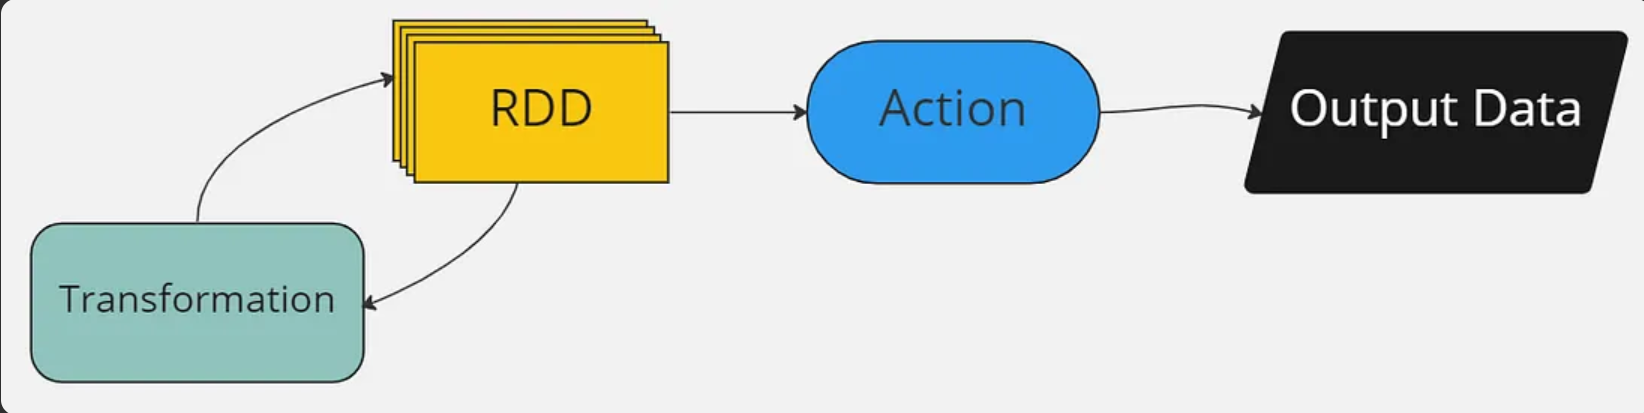

In [ ]:
"""
R1

R1 -> R2

R1 -> R2 -> R3
"""

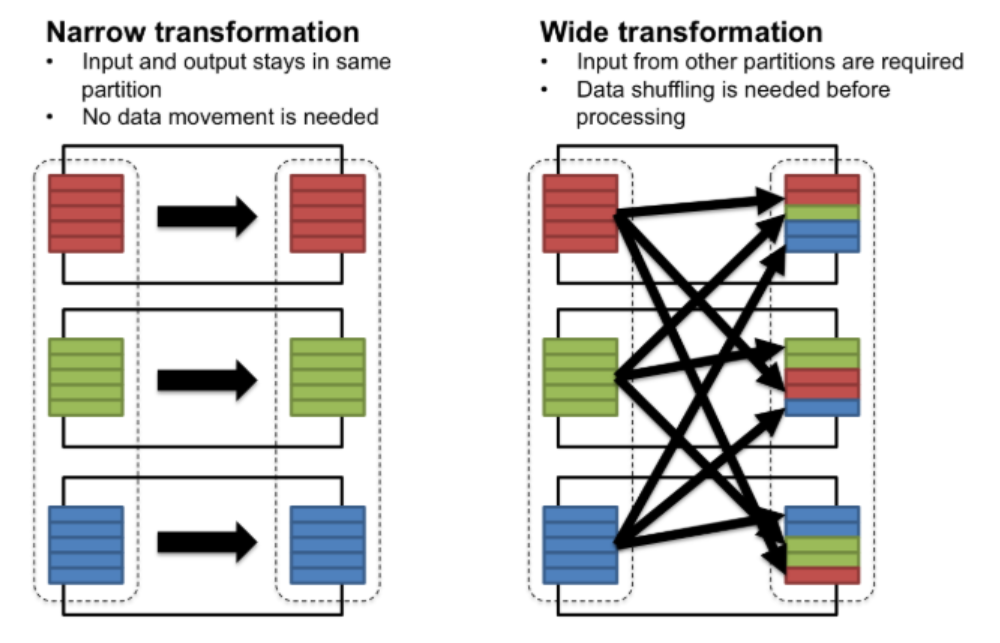

## **Narrow Transformations:**
  Narrow transformations are operations that can be performed on a single partition of a DataFrame without needing to shuffle the data across multiple partitions.
  - Faster and more efficient than wide transformations.
  - The lineage of RDDs is straightforward with narrow transformations. Each RDD depends on only one parent RDD or a set of parent RDDs that belong to the same partition.
    - One input partition results in one output partition
  - Performed in parallel on data partitions
  - Preserve the number of rows or reduce it.
  - Can be executed in a pipelined fashion without shuffling data.
  - Example: `select()`, `filter()`, `withColumn()`, `map()`, `drop()`
  - For example `filter()` does not need to understand other data present on other worker nodes.

## **Wide Transformations**  | **`Shuffle`** :
 - These are the operations that require shuffling data across partitions. This means that the data needs to be moved between executor or worker nodes. Some examples of wide transformations in Spark include e.g. Joins, repartitioning, groupBy, etc.
worker nodes need to transfer (shuffle) data across the network to complete the required task.
	- Performed after grouping data from multiple partitions
	- Example: `groupBy()`, `join()`, and `agg()`
		- `join()` we need to collect data from across the cluster to complete a join of two datasets

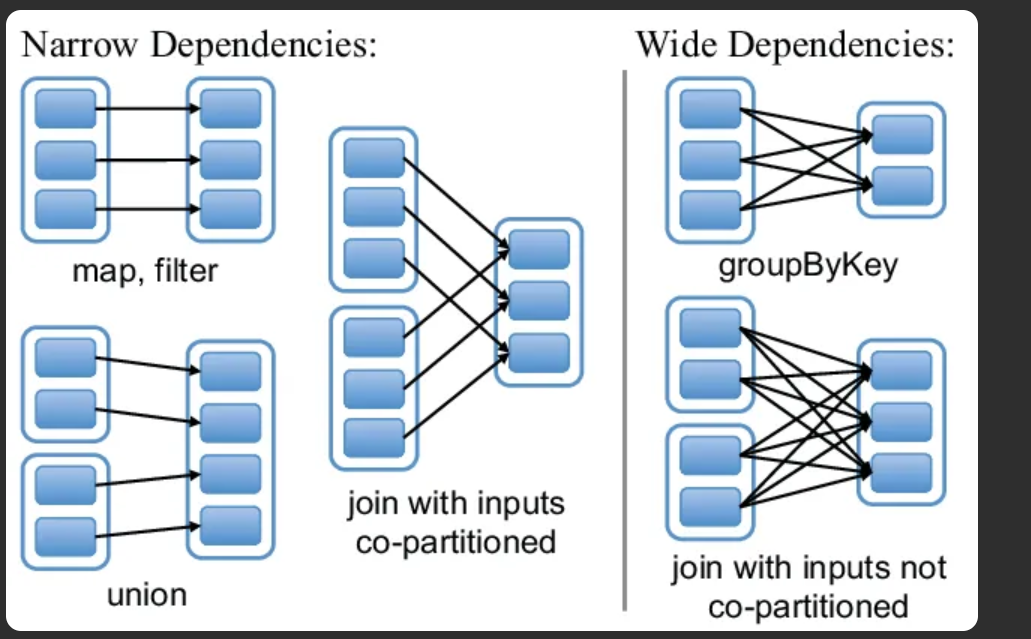

## Why co-partitioned joins are narrow transformations:

**Co-partitioned means:**
- Both DataFrames are partitioned using the same partitioning scheme
- Records with the same join key are already on the same executor/partition
- No data shuffling is required across the network

## Here's what happens:

**In a co-partitioned join:**
```
Executor 1: Partition 0 of DF1 + Partition 0 of DF2 → Join locally
Executor 2: Partition 1 of DF1 + Partition 1 of DF2 → Join locally  
Executor 3: Partition 2 of DF1 + Partition 2 of DF2 → Join locally
```

Since matching keys are guaranteed to be on the same partition, each executor can perform the join operation independently using only its local data.

**In a non-co-partitioned join:**
```
Executor 1 has: DF1[key=A], DF2[key=B]
Executor 2 has: DF1[key=B], DF2[key=A]
```

To join key=A records, data must be shuffled across executors, making it a wide transformation.

## Real-world example:

```python
# Both DataFrames partitioned by customer_id
df1 = orders.repartition("customer_id")  
df2 = customers.repartition("customer_id")

# This is a narrow transformation - no shuffle needed
result = df1.join(df2, "customer_id")
```

The diagram shows this perfectly - in narrow dependencies, each output partition depends on a limited number of input partitions from the same executor, while wide dependencies require data from multiple executors.

**Bottom line:** Co-partitioning eliminates the need for network shuffle, making the join operation narrow and much more efficient.